<a href="https://colab.research.google.com/github/lmgrj/Data-Science/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Master Informatique Specialités EID2 (DD avec WISD)</h1></center>


---


<center><h2>Traitement numérique des données</h2></center>


---
<center><h2>TP4: Clustering de données</h2></center>


---
<center><h2>By : Lamgarraj Mohamed</h2></center>




# **Partie A**

## **K-means using prédifined model**

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


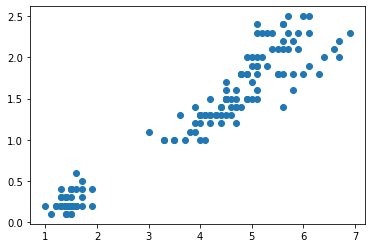

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target)
print(iris.target_names)
#Stocker les données en tant que DataFrame Pandas 
x=pd.DataFrame(iris.data)
# définir les noms de colonnes
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y=pd.DataFrame(iris.target)
a=y.columns=['Targets']
#Cluster K-means
model=KMeans(n_clusters=3)
#adapter le modèle de données
model.fit(x)
print(model.labels_)
plt.scatter(x.Petal_Length, x.Petal_width)
colormap=np.array(['Red','green','blue'])


visualiser les données iris selon les labels définis dans la dataset

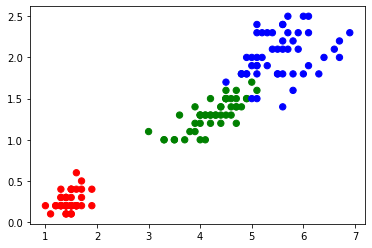

In [ ]:
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)

Visulaser les résultats données par K-means 

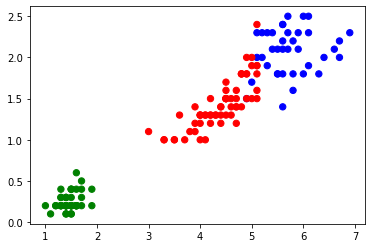

In [ ]:
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40) #presque identique au donéées réeeles 

## **Implimentation manuel de k-means**

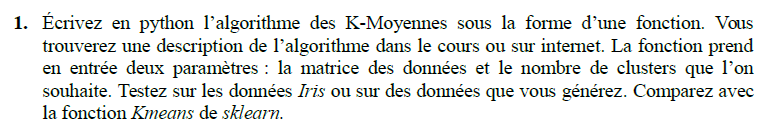

In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn import *
import matplotlib.pyplot as plt

In [ ]:
from sklearn import *
from scipy.spatial.distance import euclidean
iris = datasets.load_iris()
x=iris.data
y=iris.target


metode pour calculer la distance euclidienne

In [ ]:
def d_euclidean(x,y):
    return metrics.pairwise.euclidean_distances([x],[y])

methode K-mean

In [ ]:

def k_moyennes(data, k, max_iter = 100):
    n_iter = 0
    centroids = {}
    for i in range(k): centroids[i] = data[i]
    for i in range(max_iter):
        classes = {}
        targets = []
        for j in range(k):
            classes[j] = []
        for j in range(len(data)):
            distances = [d_euclidean(data[j], centroids[cen]) for cen in centroids]
            classe = np.argmin(distances)
            classes[classe].append(data[j])
            targets.append(classe)
        prev_centroids = dict(centroids)
        for classe in classes:
            centroids[classe] = np.mean(classes[classe], axis=0)
        
        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
        
        ccens = np.array([v for v in centroids.values()])
        pcens = np.array([v for v in prev_centroids.values()])
        n_iter += 1
        
        if (ccens == pcens).all():
            break
        
    for k,v in classes.items(): classes[k] = np.array(v)
    return targets, n_iter

tester notre methode sur Iris

In [ ]:
targets, n_iter = k_moyennes(x,3)
print(targets)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]


Visualiser les resultats de notre methode et les comparées avec les vrais résultats

In [ ]:
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']

<function matplotlib.pyplot.show>

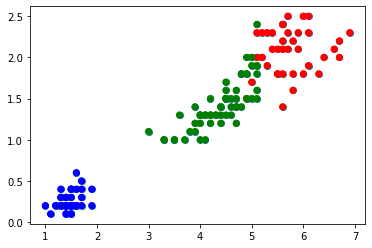

In [ ]:
plt.scatter(X.Petal_Length, X.Petal_width)
colormap=np.array(['Red','green','blue'])
plt.scatter(X.Petal_Length, X.Petal_width,c=colormap[targets],s=40)
plt.show

il est claire que notre implimentation manuel de k-means a données des bonnes résultats (presque les meme que les données réel et que les resultat de k-means défini dans Sklearn)

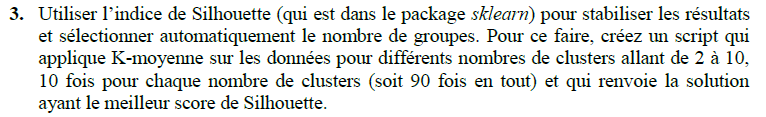

Trouver le meilleur score Utilisant l’indice de Silhouette 

In [ ]:
def get_meilleur_score(X):
    scores = []
    for i in range(2, 11):
        for j in range(10):
            kmeans = cluster.KMeans(n_clusters=i).fit(X)
            pred = kmeans.fit_predict(x)
            score = metrics.silhouette_score(X, pred)
            scores.append((j+1,i,score))
    scores.sort(key = lambda x:x[2], reverse=True)
    return scores[0]

In [ ]:
(iterations, n_clusters, score) = get_meilleur_score(x)

In [ ]:
print(f"le meilleur score est : {score} \n le nombre des clusters est: {n_clusters} \n  numero d'iteration  {iterations}")

le meilleur score est : 0.681046169211746 
 le nombre des clusters est: 2 
  numero d'iteration  1


## **PCA et IDA**

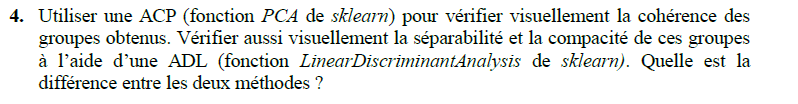

**PCA et IDA pour garder deux variables**

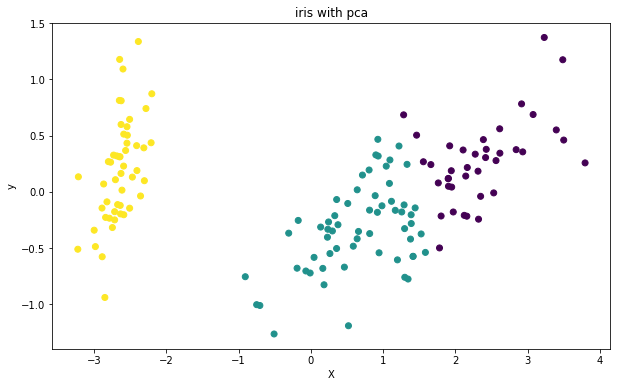

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import random as rd

Pca = PCA(n_components=2)
Lda = LDA(n_components=2)

pca_iris = Pca.fit(x).transform(x)
lda_iris = Lda.fit(x,targets).transform(x)

plt.figure(figsize=(10,6))
plt.scatter(pca_iris[:,0], pca_iris[:,1], c=targets)
plt.title('iris with pca')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

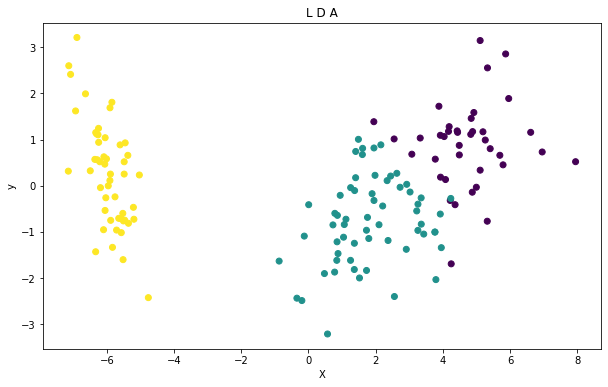

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(lda_iris[:,0], lda_iris[:,1], c=targets)
plt.title('L D A')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from copy import deepcopy
import numpy as np
import matplotlib.cm as cm
from sklearn import *
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
iris = datasets.load_iris()

X = iris.data
category = iris.target
y = category


pour lr nombre de clusters = 2 l'indice silhouette est : 0.681046169211746


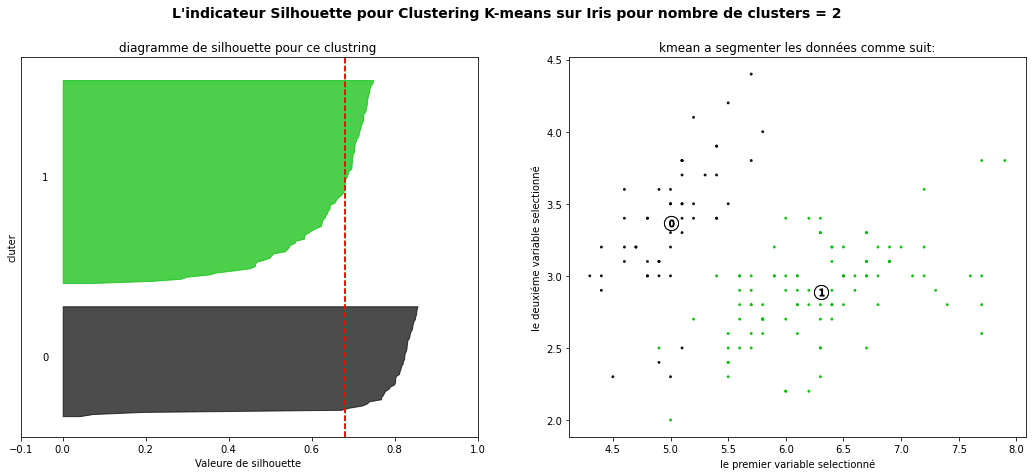

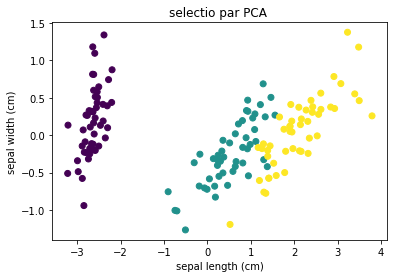

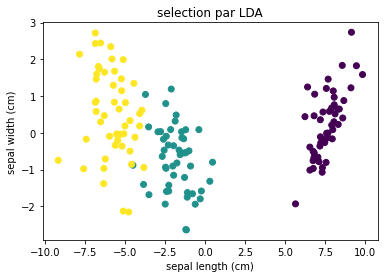

pour lr nombre de clusters = 3 l'indice silhouette est : 0.5528190123564091


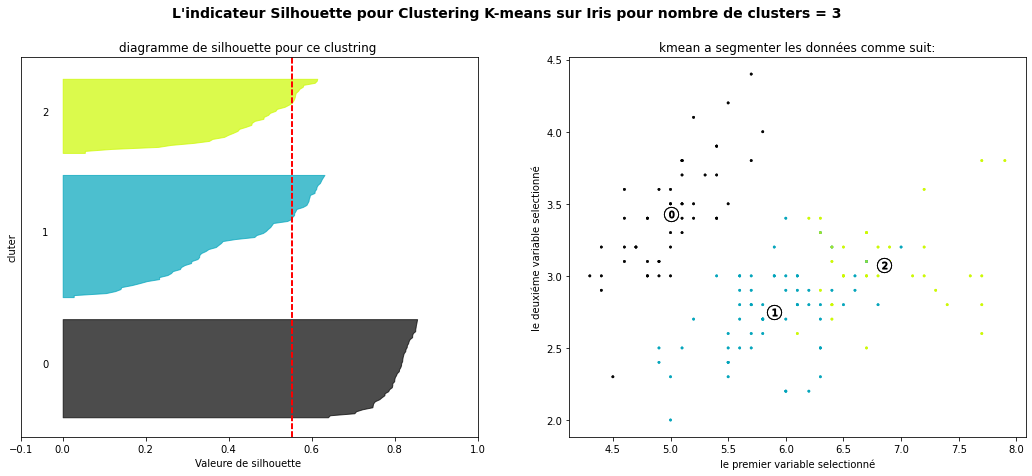

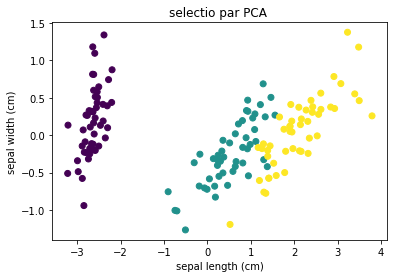

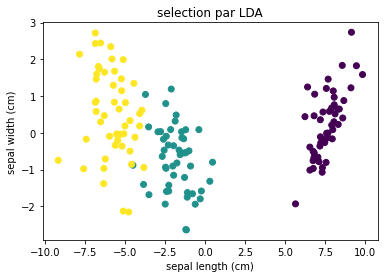

pour lr nombre de clusters = 4 l'indice silhouette est : 0.4980505049972867


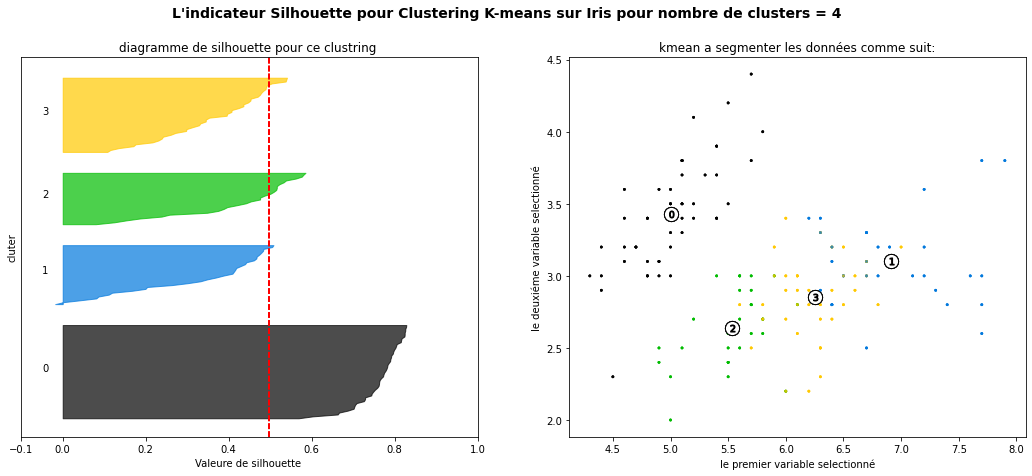

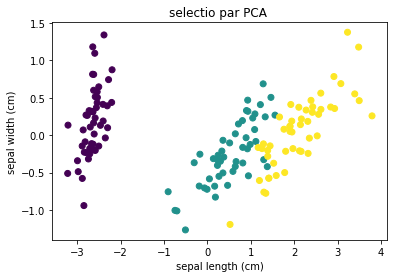

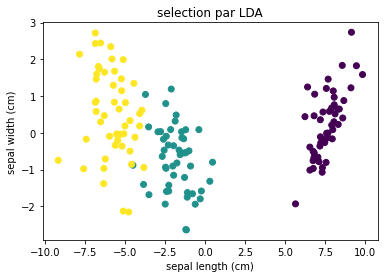

In [ ]:
range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("pour le nombre de clusters =", n_clusters,"l'indice silhouette est :", silhouette_avg)

    # calculer silhouette pour chaque lement
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
#silhouette pour lles clusters et le clustering gobale
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("diagramme de silhouette pour ce clustring ")
        ax1.set_xlabel("Valeure de silhouette ")
        ax1.set_ylabel("cluter")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([]) 
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("kmean a segmenter les données comme suit:")
        ax2.set_xlabel("le premier variable selectionné")
        ax2.set_ylabel("le deuxiéme variable selectionné")

        plt.suptitle(("L'indicateur Silhouette pour Clustering K-means sur Iris "
                      "pour nombre de clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        
#ploting tout les visualisations pca,lda et silhouette diagramme
    plt.show()
    pca = PCA(n_components=2)
    IrisPCA = pca.fit(X).transform(X)
    plt.title('selectio par PCA ')
    plt.scatter(IrisPCA[:, 0], IrisPCA[:, 1], c=iris.target, cmap='viridis')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

    lda = LinearDiscriminantAnalysis(n_components=2)
    IrisLDA = lda.fit(X, y).transform(X)
    plt.title('selection par LDA')
    plt.scatter(IrisLDA[:, 0], IrisLDA[:, 1], c=iris.target, cmap='viridis')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# **Partie B**

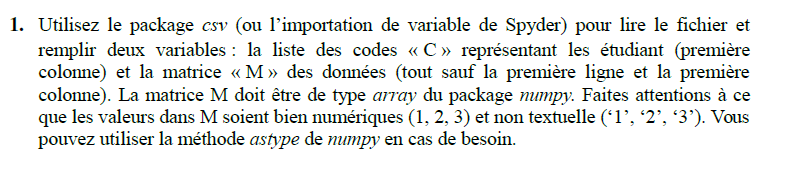

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/DataMining/choixprojetstab.csv', sep=';') 

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head

<bound method NDFrame.head of        étudiant·e  ga.vTZVmBFaC.  ...  gay0.j6cCUFM.  gazuii0BJkiyo
0   bl/.vSDYCGrSs              1  ...              1              3
1   bl/1NiMubceBs              1  ...              1              1
2   bl/dvgMTLVSvk              0  ...              0              0
3   bl1NWhKcNADF2              1  ...              1              1
4   bl1ao5B7htJfQ              1  ...              0              2
..            ...            ...  ...            ...            ...
66  blvqKhCDhQab.              1  ...              1              1
67  blwyn40XjgvEs              1  ...              1              0
68  bly3Oqsvf6WlU              1  ...              0              2
69  bly69tf4z1FiM              1  ...              1              1
70  blzon470EHguA              1  ...              1              1

[71 rows x 81 columns]>

In [ ]:
targety=data['étudiant·e']

In [ ]:
targety.head

<bound method NDFrame.head of 0     bl/.vSDYCGrSs
1     bl/1NiMubceBs
2     bl/dvgMTLVSvk
3     bl1NWhKcNADF2
4     bl1ao5B7htJfQ
          ...      
66    blvqKhCDhQab.
67    blwyn40XjgvEs
68    bly3Oqsvf6WlU
69    bly69tf4z1FiM
70    blzon470EHguA
Name: étudiant·e, Length: 71, dtype: object>

In [ ]:
data.drop(columns=data.columns[0], 
        axis=1, 
        inplace=True)

In [ ]:
datax=data
datax.head

<bound method NDFrame.head of     ga.vTZVmBFaC.  ga/mLSm4ai/6g  ...  gay0.j6cCUFM.  gazuii0BJkiyo
0               1              1  ...              1              3
1               1              1  ...              1              1
2               0              0  ...              0              0
3               1              1  ...              1              1
4               1              1  ...              0              2
..            ...            ...  ...            ...            ...
66              1              1  ...              1              1
67              1              1  ...              1              0
68              1              1  ...              0              2
69              1              1  ...              1              1
70              1              1  ...              1              1

[71 rows x 80 columns]>

In [ ]:
datax=np.array(datax)

In [ ]:
print(datax)

[[1 1 1 ... 1 1 3]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 0 0]
 ...
 [1 1 1 ... 1 0 2]
 [1 1 0 ... 1 1 1]
 [1 1 1 ... 0 1 1]]


In [ ]:
print(type(datax))
print(type(targety))
print(len(datax))
print(len(targety))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
71
71


In [ ]:
print(datax.max())

3


## **K-means**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(datax)
kmeans_pred = kmeans.labels_
print(len(kmeans_pred))
print(kmeans_pred)

71
[2 0 3 0 3 0 0 0 2 0 0 1 3 0 0 0 3 0 3 0 0 0 3 2 0 0 0 0 0 0 0 1 0 1 0 1 0
 3 0 0 1 0 0 0 2 3 0 0 0 0 0 0 3 0 0 3 0 0 0 0 3 0 2 0 1 3 0 0 0 0 0]


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg_kmeans = silhouette_score(datax, kmeans_pred)


In [ ]:
print("l'indice sihouette pour ce clustering est : ",silhouette_avg_kmeans)

l'indice sihouette pour ce clustering est :  0.29043701764448937


## **Hierarchical clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(datax)
labels = ward.labels_

In [ ]:
print(labels)

[3 2 1 2 1 0 0 2 3 2 2 0 1 2 2 2 1 2 1 2 2 0 1 3 2 2 2 2 2 2 2 1 2 0 2 1 2
 1 0 2 0 2 2 2 3 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 0 2 0 1 2 2 0 2 2]


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg_herarchi = silhouette_score(datax, labels)

In [ ]:
print("l'indice sihouette pour ce clustering est : ",silhouette_avg_herarchi)

l'indice sihouette pour ce clustering est :  0.2884593801353125


## **Affinity Propagation**

In [ ]:
from sklearn.cluster import AffinityPropagation
# Fit Affinity Propagation with Scikit learn
afprop = AffinityPropagation(max_iter=800)
afprop.fit(datax)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
# Predict the cluster for all the samples
P = afprop.predict(datax)
print(P)

[ 6  1  3  1  4  0  5  1  6  1  1  8  2  1  1  1  3  1  4  1  1  5 11  6
  1  1  1  1  1  1  1  7  1  8  1  7  1  3  1  1  9  1  1  1  6  2  1  1
  1  1  1  1  3  1  1  3  1  1  1  1  3  1 10  1  9 11  1  1  1  1  1]


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg_aff_p = silhouette_score(datax, P)

In [ ]:
print("l'indice sihouette pour ce clustering est : ",silhouette_avg_aff_p)

l'indice sihouette pour ce clustering est :  0.4170696466923136


## **Optic clustering**

In [ ]:
from sklearn.cluster import OPTICS
from numpy import *
from matplotlib import pyplot
# define the model
model = OPTICS(eps=0.9, min_samples=4)
# fit model and predict clusters
model.fit(datax)
lanels = model.fit_predict(datax)
print(labels)



[3 2 1 2 1 0 0 2 3 2 2 0 1 2 2 2 1 2 1 2 2 0 1 3 2 2 2 2 2 2 2 1 2 0 2 1 2
 1 0 2 0 2 2 2 3 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 0 2 0 1 2 2 0 2 2]


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg_optic = silhouette_score(datax, labels)

In [ ]:
print("l'indice sihouette pour ce clustering est : ",silhouette_avg_optic)

l'indice sihouette pour ce clustering est :  0.2884593801353125


# **@author**

<h3> LAMGARRAJ Mohamed</h3>
USMBA_FSDM_FES ---> Master: Web Intelligence and Data Science(WISD)



USPN_Paris ---> Master: Exploration Informatique des Données et Décisionnel(EID2)



linkedin: https://www.linkedin.com/in/mohamed-lamgarraj-61b3341a3/

kaggle: https://www.kaggle.com/mohamedlamgarraj

github: https://github.com/lmgrj